<a href="https://colab.research.google.com/github/AKD24-pixel/Kidney_Stone_detection/blob/main/Copy_of_train_yolo11_object_detection_on_custom_dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Nov  4 15:37:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

workspace = rf.workspace("liangdianzhong")
project = rf.workspace("aryan-kaushik-sj4fm").project("kidney-stone-detecton-8xfjw")
version = project.version(4)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Kidney-stone-detecton-4 in yolov11:: 100%|██████████| 100/100 [00:00<00:00, 2700.83it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 batch=8 plots=True


/content
100% 18.4M/18.4M [00:00<00:00, 235MB/s]
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/Kidney-stone-detecton-4/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch360.jpg
confusion_matrix.png				    R_curve.png       train_batch361.jpg
events.out.tfevents.1730734711.93297dcc8e10.1614.0  results.csv       train_batch362.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


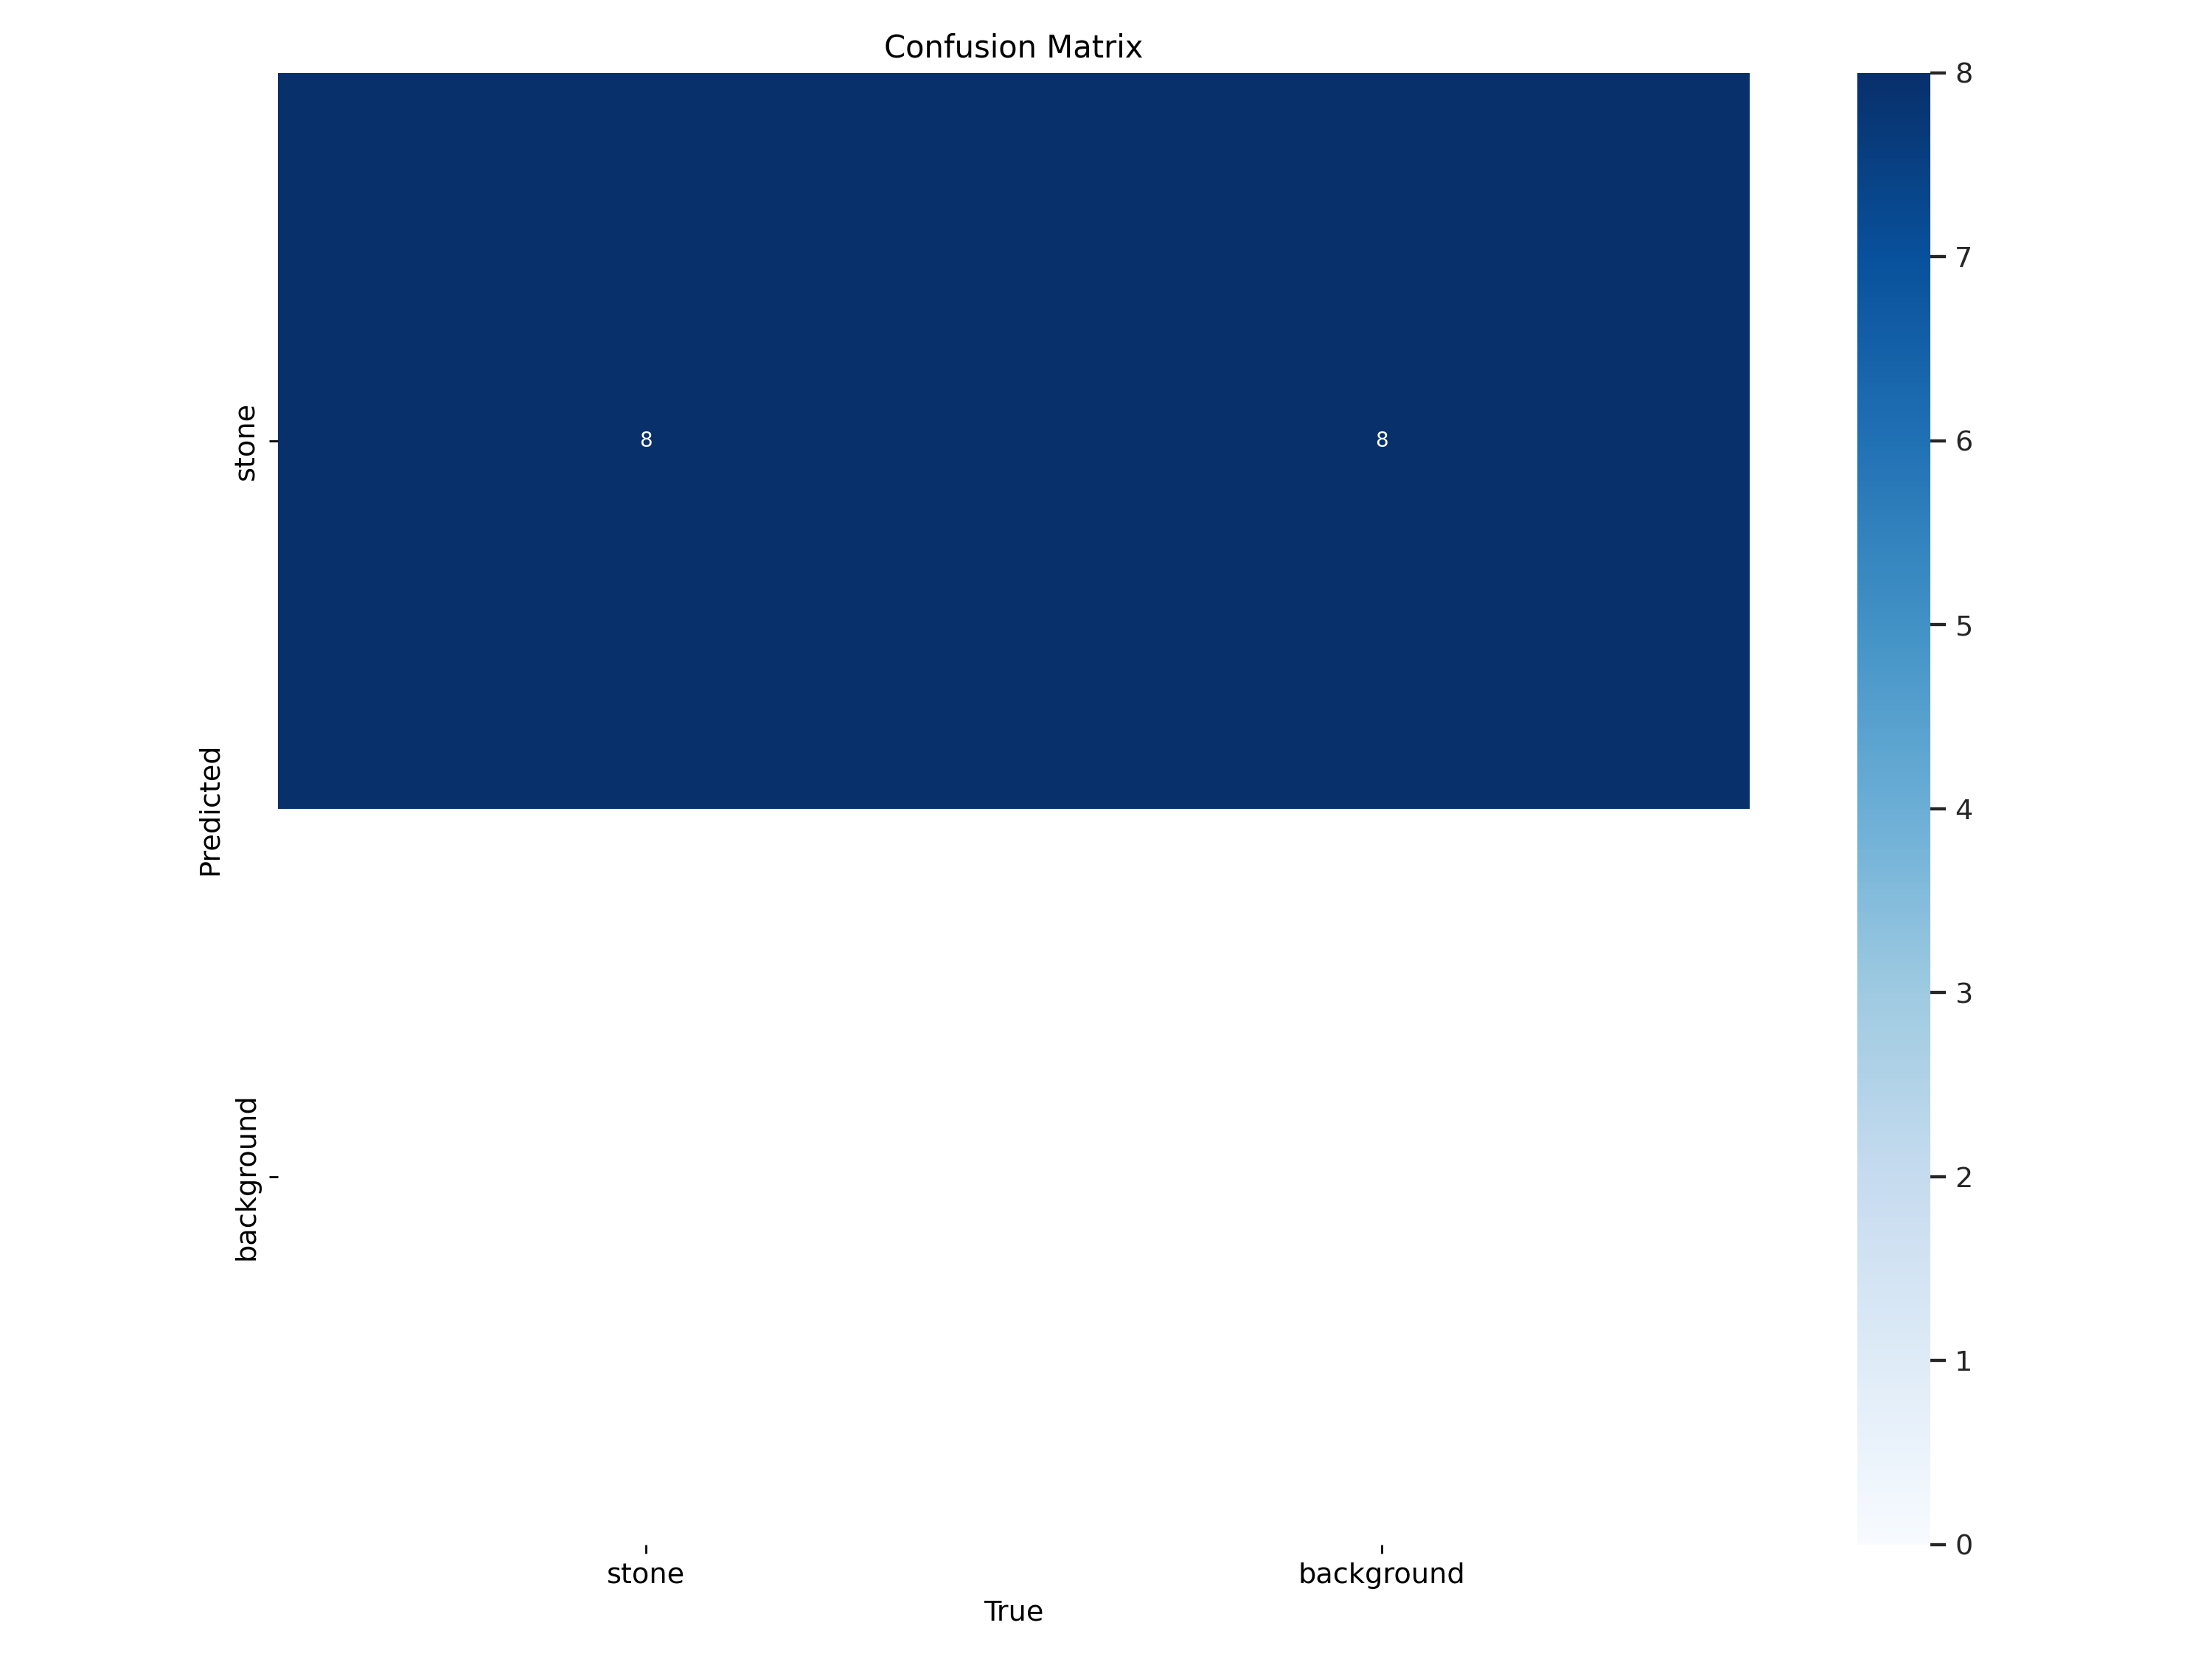

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

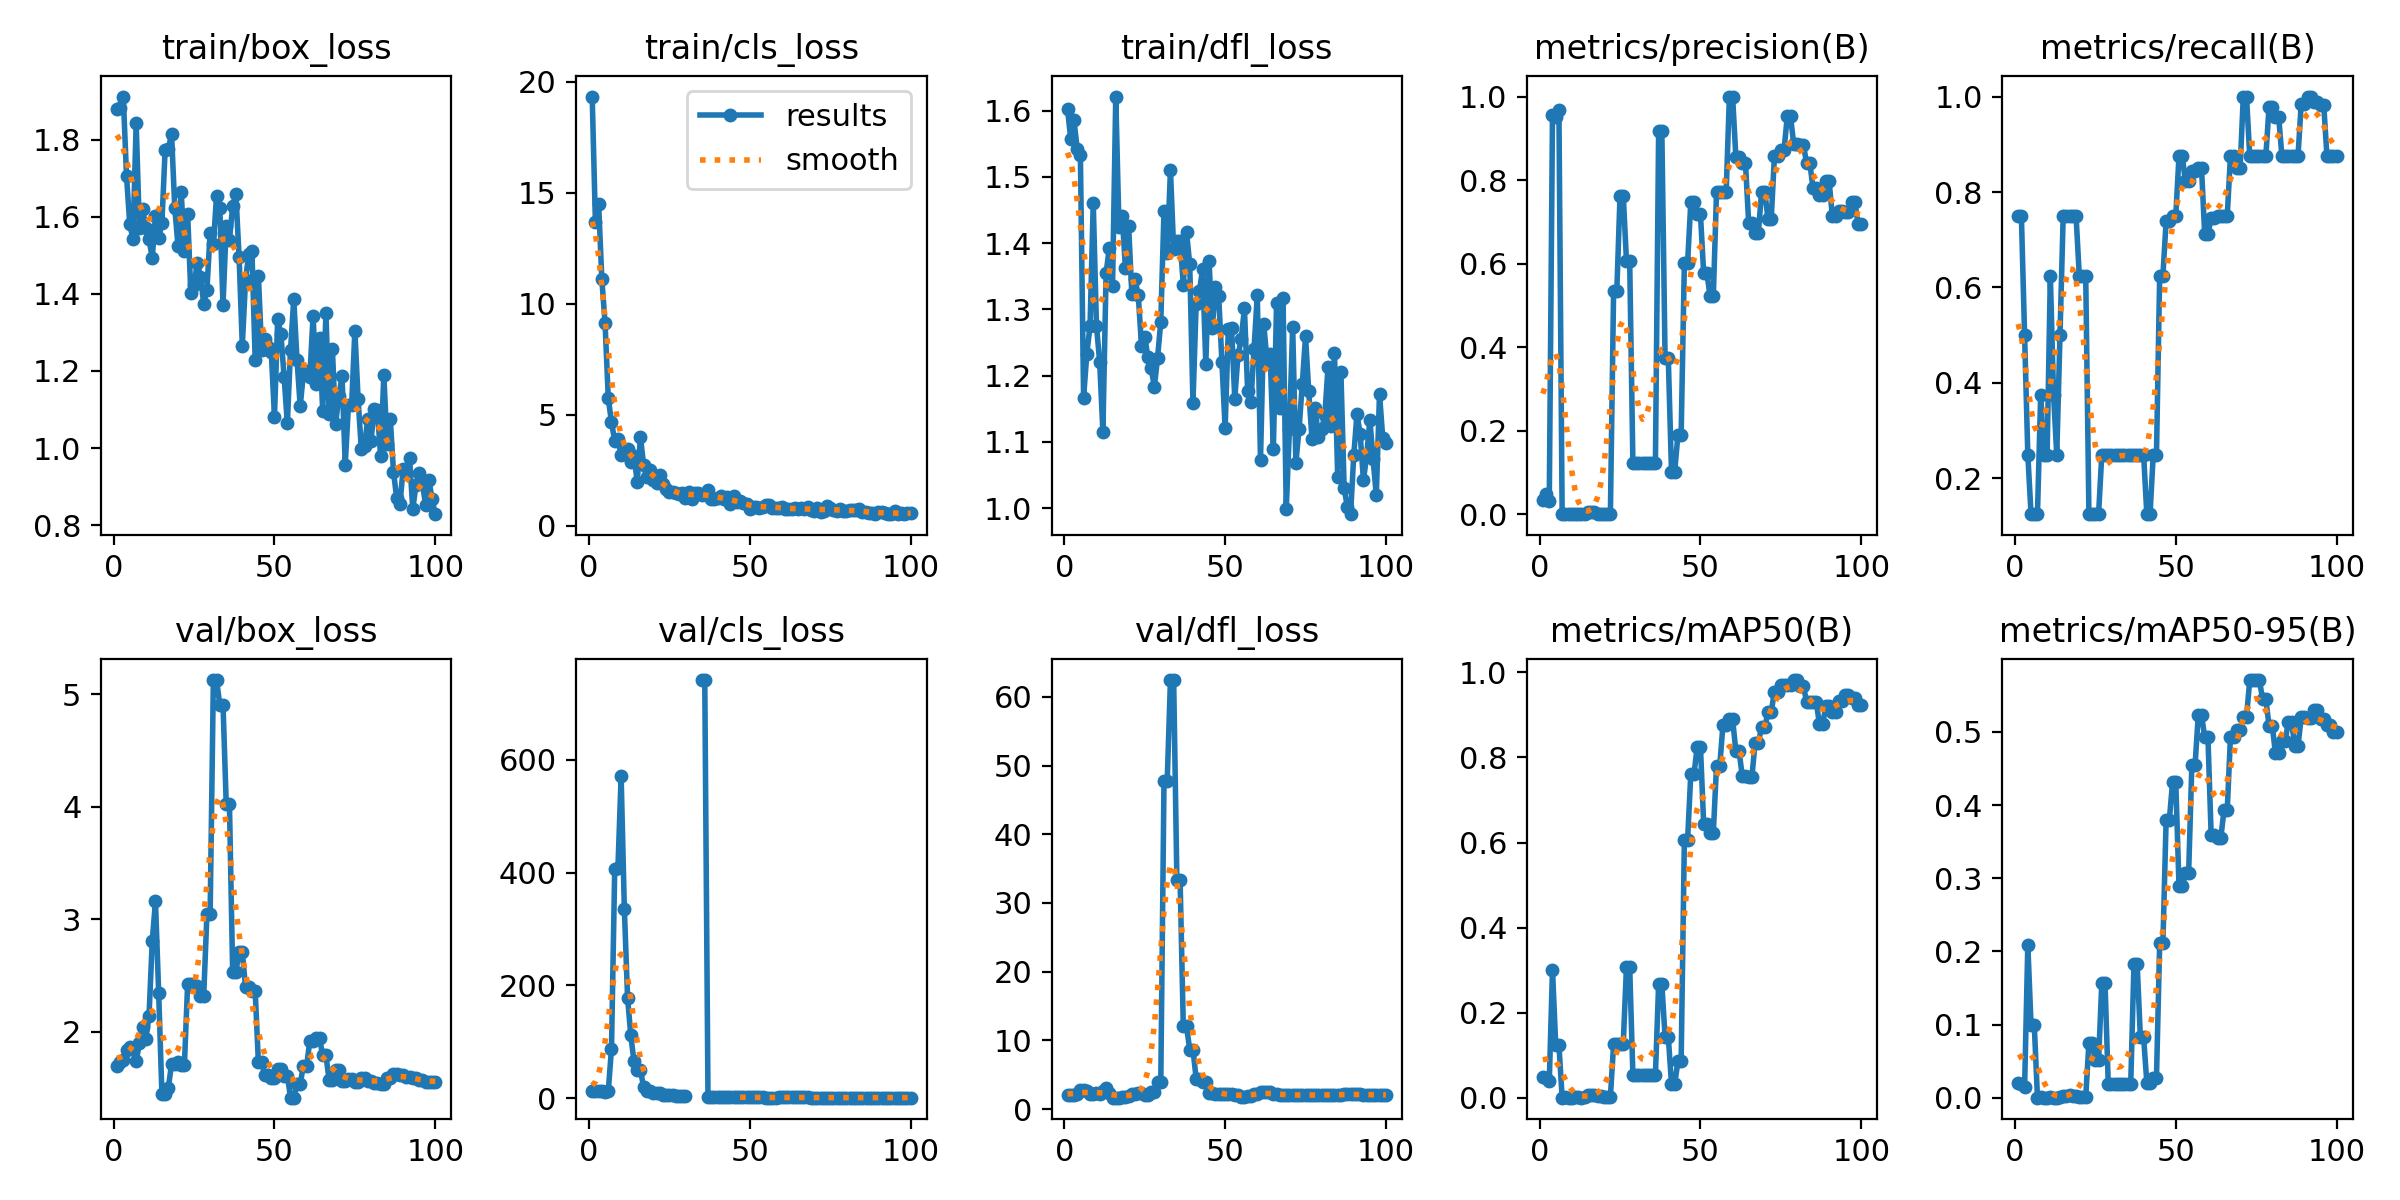

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

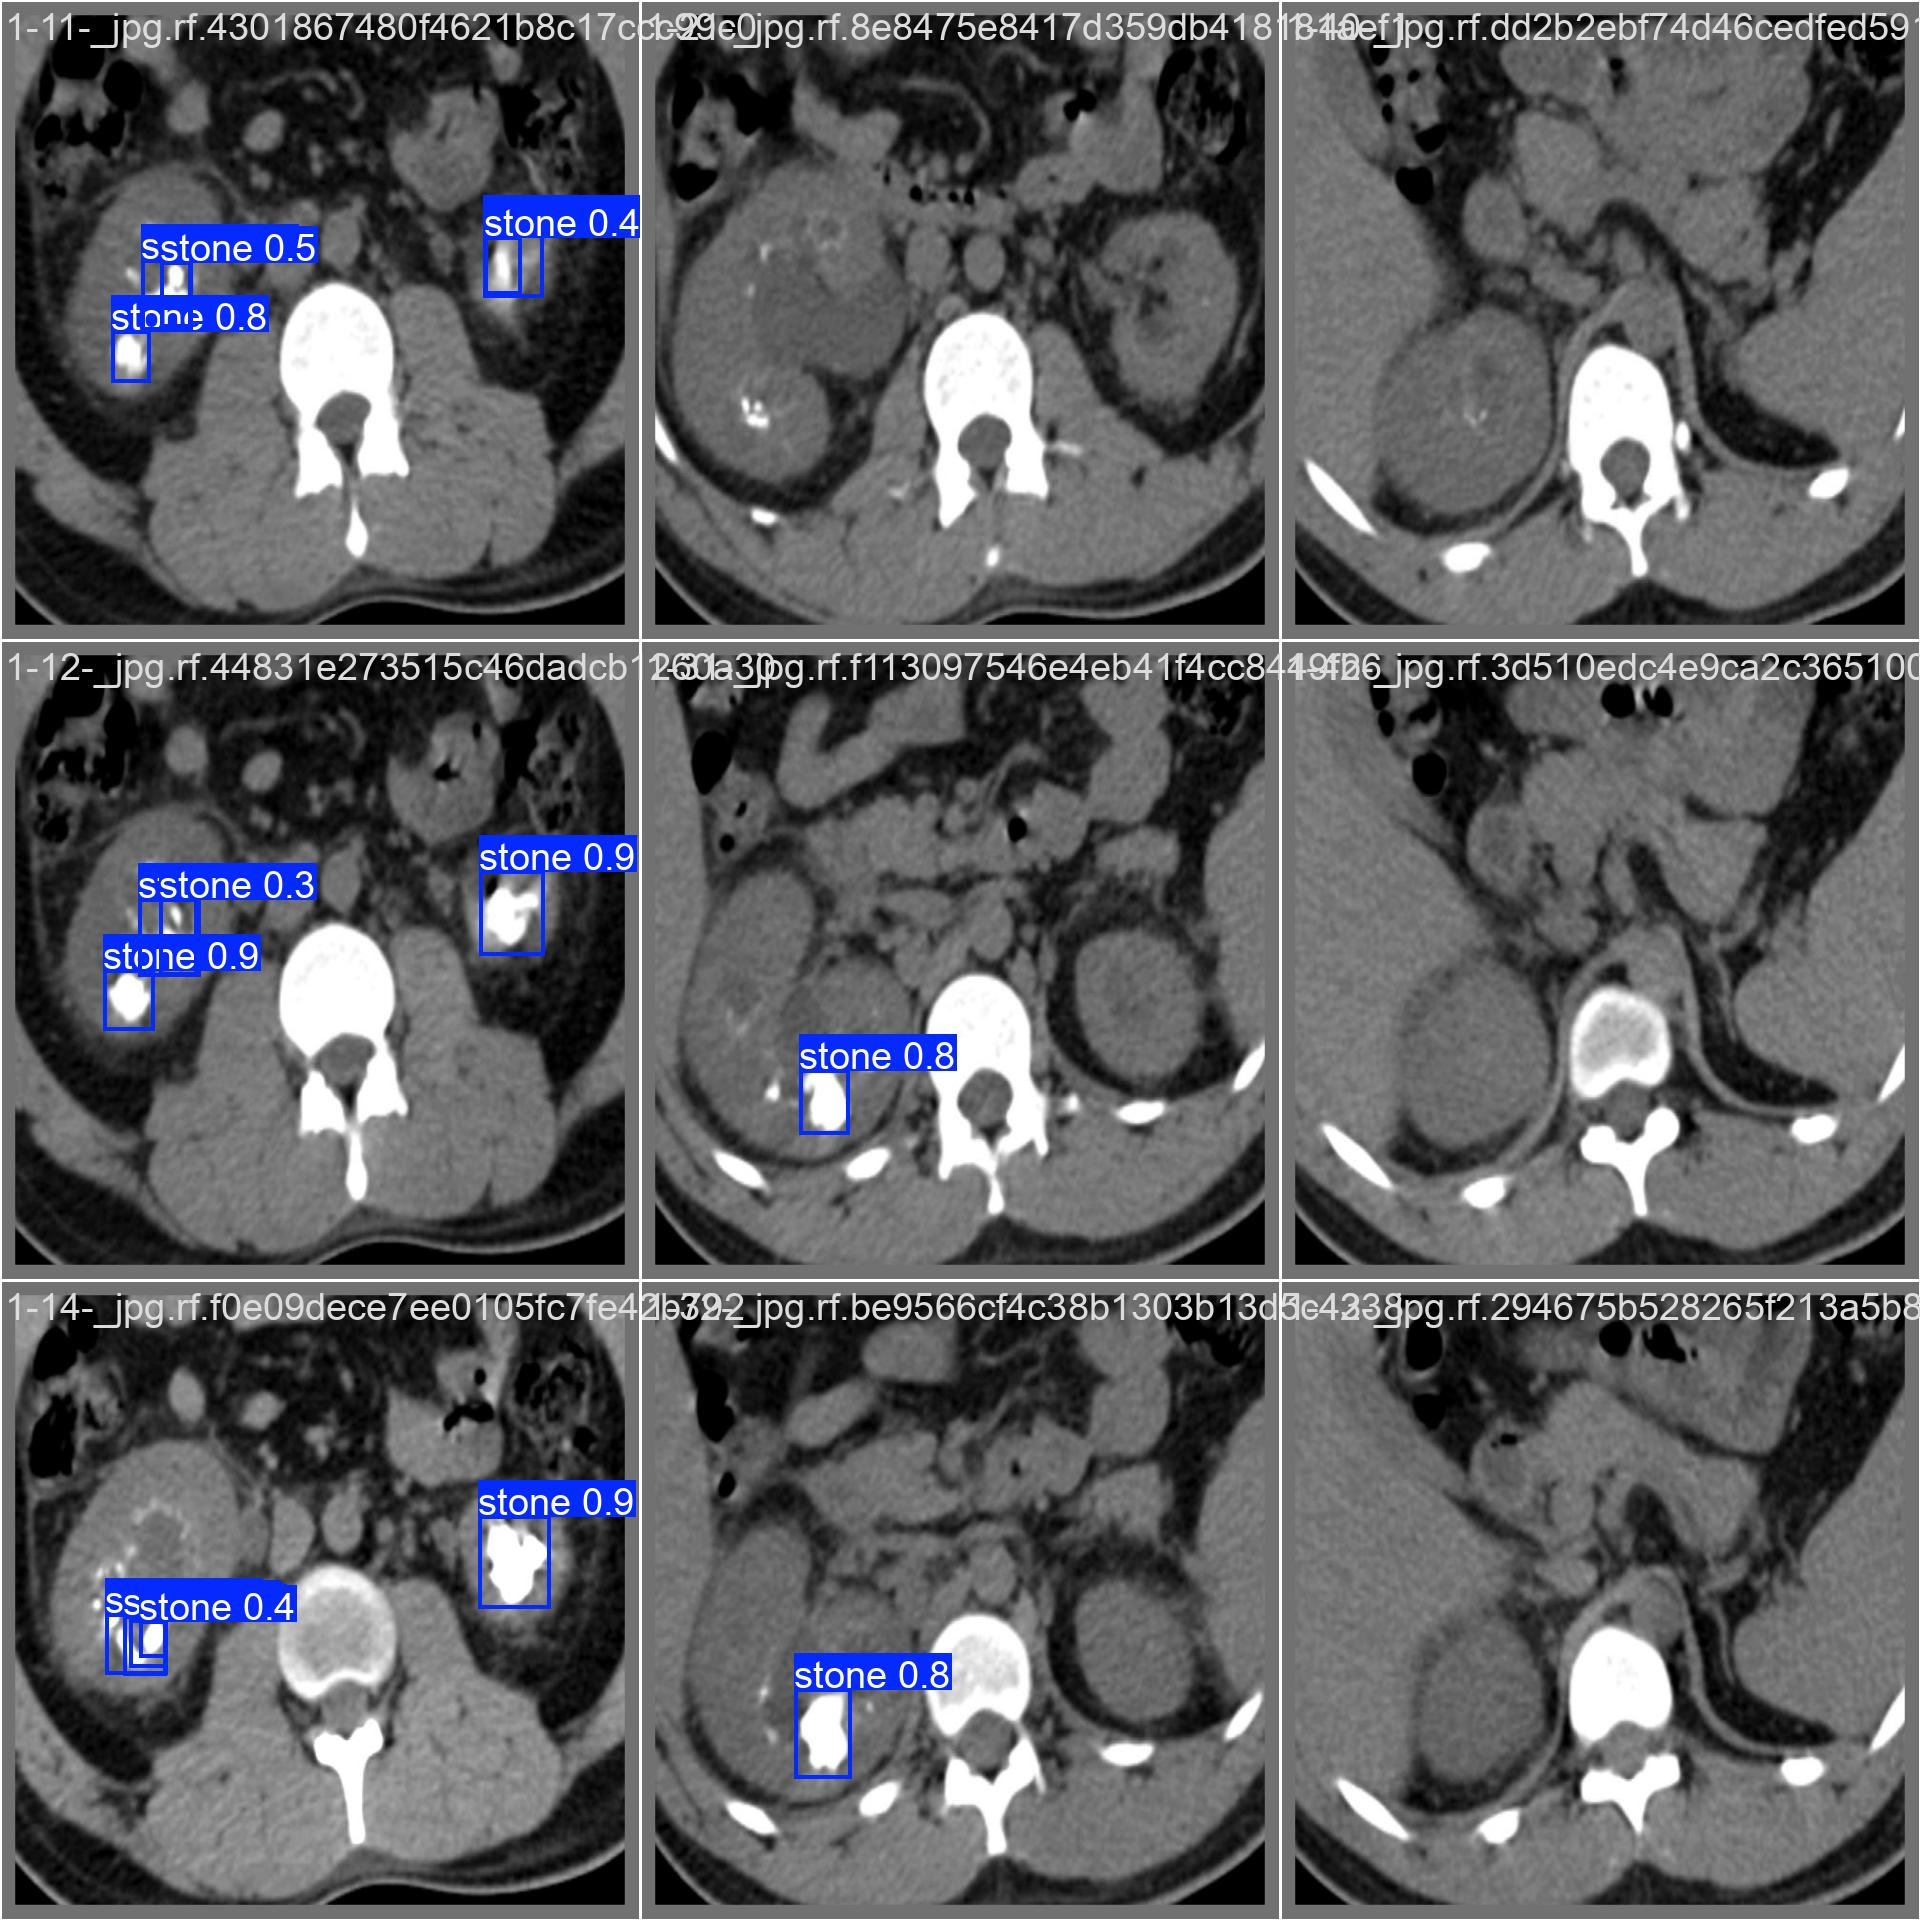

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/Kidney-stone-detecton-4/valid/labels.cache... 9 images, 4 backgrounds, 0 corrupt: 100% 9/9 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.12it/s]
                   all          9          8      0.872      0.875      0.971      0.571
Speed: 0.5ms preprocess, 14.3ms inference, 0.0ms loss, 67.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/4 /content/datasets/Kidney-stone-detecton-4/test/images/1-26-_jpg.rf.884dd492900ef504870e05b638bae89b.jpg: 640x640 1 stone, 15.6ms
image 2/4 /content/datasets/Kidney-stone-detecton-4/test/images/1-33-_jpg.rf.cc34de588fcd9c7bb1af7857c7151749.jpg: 640x640 1 stone, 15.6ms
image 3/4 /content/datasets/Kidney-stone-detecton-4/test/images/1-39-_jpg.rf.33b4e4bdeff5abfbdb99fb3f63fcf158.jpg: 640x640 (no detections), 15.5ms
image 4/4 /content/datasets/Kidney-stone-detecton-4/test/images/1-44-_jpg.rf.d54ed3550c75650498e4889d77a45fa3.jpg: 640x640 (no detections), 15.6ms
Speed: 1.9ms preprocess, 15.6ms inference, 156.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


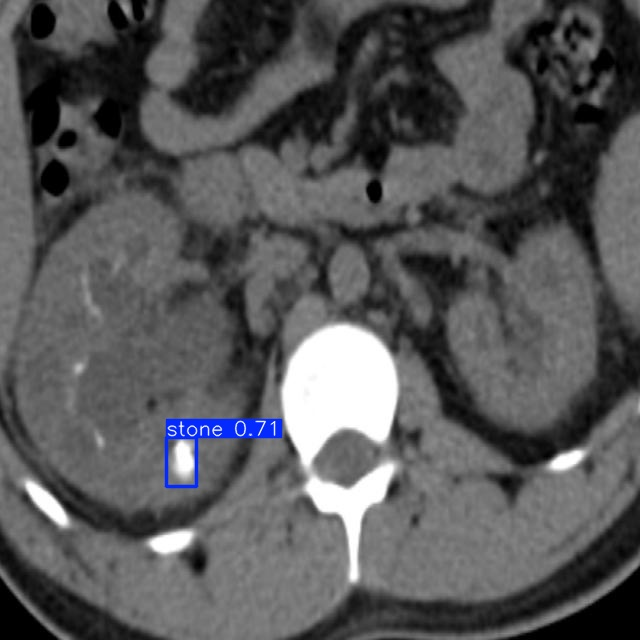

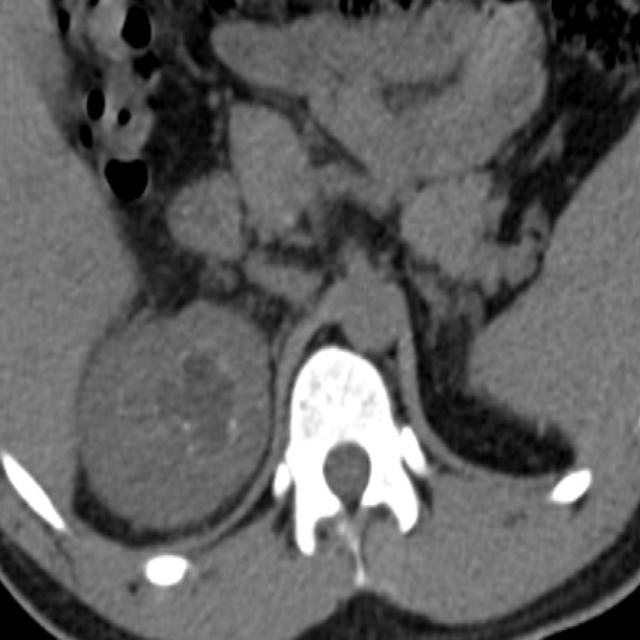

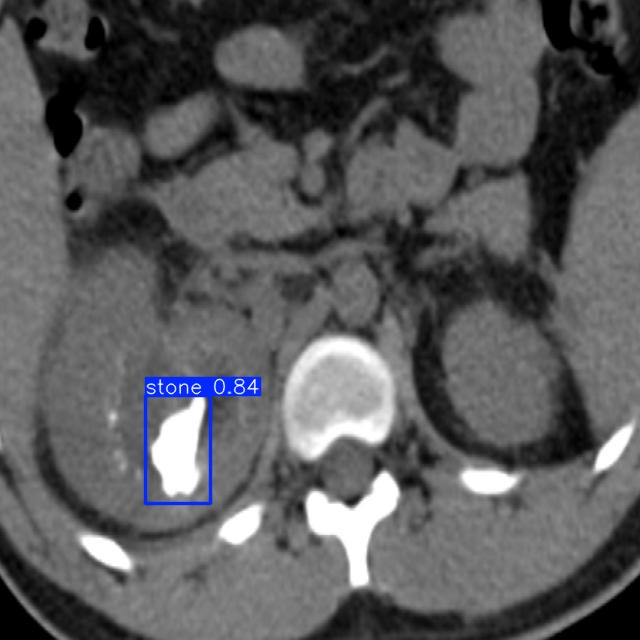

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!pip install numpy scikit-learn


In [ ]:
import os
import json

# Define the paths
ground_truth_labels_path = '/content/datasets/Kidney-stone-detecton-4/test/labels'
predicted_images_path = '/content/runs/detect/predict'  # Directory containing prediction output images

# Function to check if "stone" is present in the label files
def has_stone_in_labels(label_file_path):
    with open(label_file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            # Check if the first item in line indicates the class 'stone' (0)
            if line.strip().split()[0] == '0':  # Assuming '0' indicates 'stone'
                return 1  # Stone present
    return 0  # No stone

# Create y_true based on ground truth labels
y_true = []
for label_file in os.listdir(ground_truth_labels_path):
    if label_file.endswith('.txt'):
        label_path = os.path.join(ground_truth_labels_path, label_file)
        y_true.append(has_stone_in_labels(label_path))

# Function to get the predicted label for each image
def get_prediction_for_image(image_file):
    # Construct the expected JSON prediction filename (adjust this if your naming is different)
    prediction_file = image_file.replace('.jpg', '.json')
    prediction_path = os.path.join(predicted_images_path, prediction_file)

    if os.path.exists(prediction_path):
        with open(prediction_path, 'r') as f:
            predictions = json.load(f)
            # Check if there's any prediction for 'stone'
            if predictions['predictions']:  # If the list is not empty
                return 0  # Stone detected
    return 1  # No stone detected

# Collect predicted labels based on prediction outputs
y_pred = []
for img_file in os.listdir(predicted_images_path):
    if img_file.endswith('.jpg'):
        predicted_class_id = get_prediction_for_image(img_file)
        y_pred.append(predicted_class_id)

# Display the results
print("True labels (y_true):", y_true)
print("Predicted labels (y_pred):", y_pred)



True labels (y_true): [1, 0, 1, 0]
Predicted labels (y_pred): [1, 1, 1, 1]


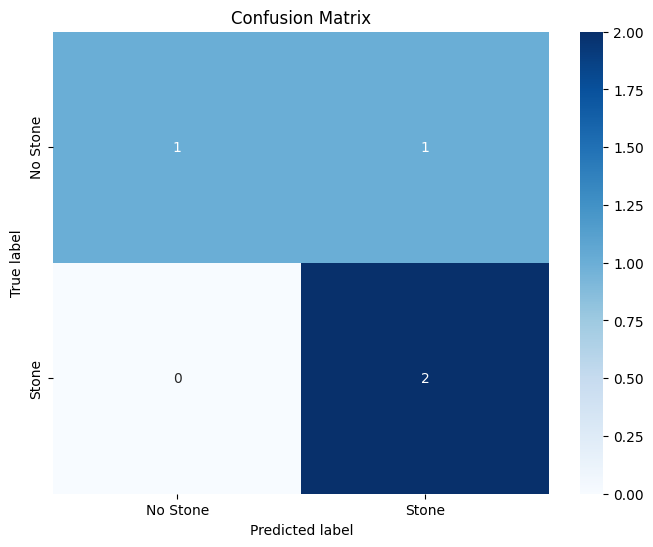

              precision    recall  f1-score   support

    No Stone       1.00      0.50      0.67         2
       Stone       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])  # Specify labels as [0, 1]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stone', 'Stone'], yticklabels=['No Stone', 'Stone'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report (includes precision, recall, f1-score)
report = classification_report(y_true, y_pred, target_names=['No Stone', 'Stone'])
print(report)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Extracting values from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
sensitivity = recall_score(y_true, y_pred)  # Same as True Positive Rate
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
precision = precision_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.75
Sensitivity (Recall): 1.00
Specificity: 0.50
Precision: 0.67
F1 Score: 0.80
